# Iris Dataset PreProcessing

In [2]:
# Load Dataset
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Show first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


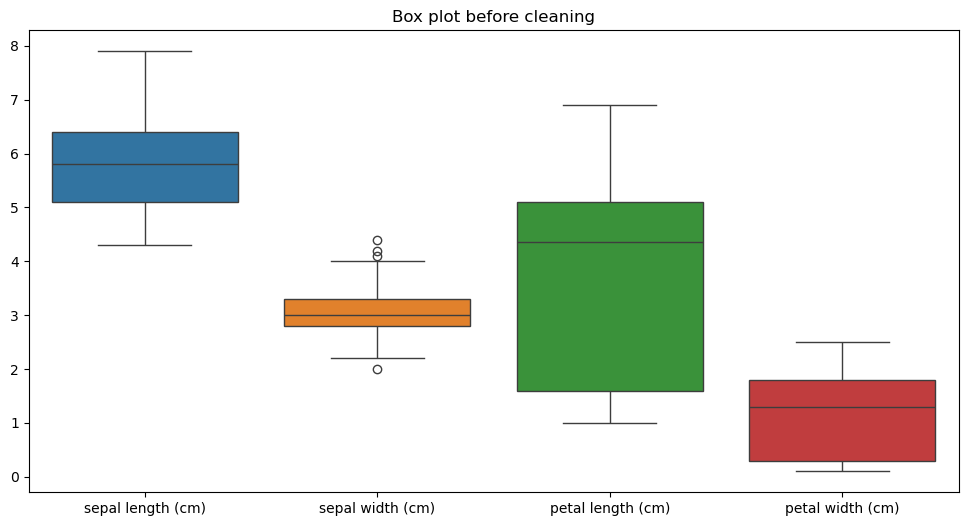

In [3]:
# boxplot before cleaning the data (check Outliers)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df[iris.feature_names])
plt.title("Box plot before cleaning")
plt.show()


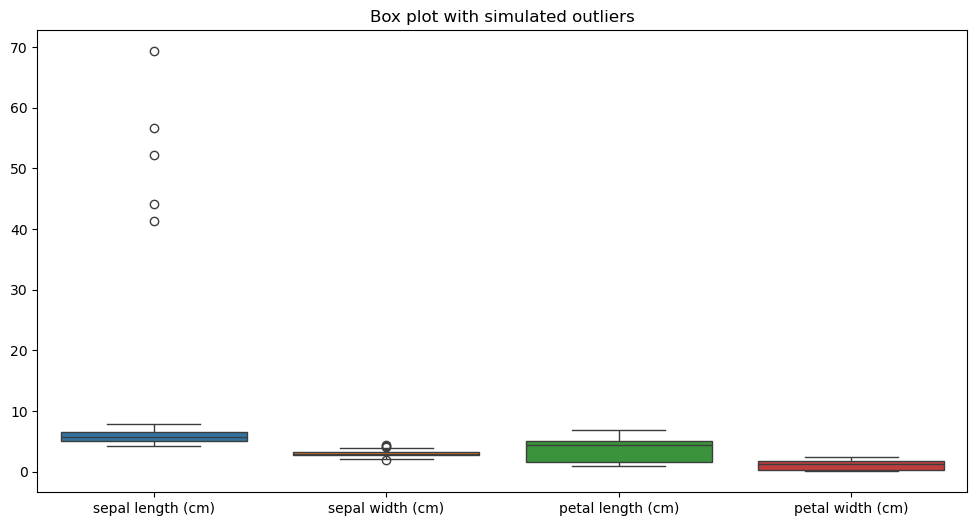

In [5]:
# preprocessing & cleaning dataset (Artificially create outliers)
import numpy as np
np.random.seed(0)
outliers_indices = np.random.choice(df.index, 5)
df.loc[outliers_indices, 'sepal length (cm)'] = df['sepal length (cm)'] * 3

# Box plot to see outliers clearly
plt.figure(figsize=(12,6))
sns.boxplot(data=df[iris.feature_names])
plt.title("Box plot with simulated outliers")
plt.show()



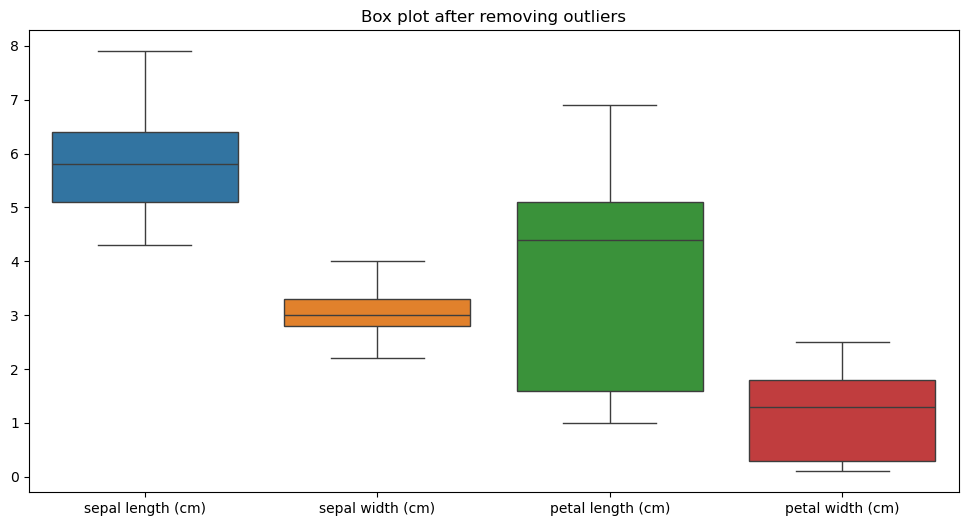

In [6]:
# Remove outliers using IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_clean = remove_outliers(df, iris.feature_names)

# Box plot after cleaning
plt.figure(figsize=(12,6))
sns.boxplot(data=df_clean[iris.feature_names])
plt.title("Box plot after removing outliers")
plt.show()


In [12]:
df_clean.to_csv('iris cleandataset.csv')